<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **PREDICT DATA & MODELLING - DATA TRAIN**

## Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
!pip install lightgbm
import lightgbm as lgbm

# For feature importance
from sklearn.datasets import make_classification
from matplotlib import pyplot

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## A. EDA

### 1.1 Data Loading

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/Demo/credit_risk.csv')
df

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
1,1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
2,2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
3,3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
4,4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,1001,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,10,dewasa,1
36253,36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,1,dewasa,1
36254,36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,5,lansia,1
36255,36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,7,lansia,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   Id_customer          36257 non-null  int64  
 2   JenisKelamin         36257 non-null  object 
 3   KepemilikanMobil     36257 non-null  object 
 4   KepemilikanProperti  36257 non-null  object 
 5   JmlAnak              36257 non-null  int64  
 6   Pendapatan           36257 non-null  float64
 7   TipePendapatan       36257 non-null  object 
 8   TingkatPendidikan    36257 non-null  object 
 9   StatusKeluarga       36257 non-null  object 
 10  TipeRumah            36257 non-null  object 
 11  FlagMobile           36257 non-null  int64  
 12  FlagWorkPhone        36257 non-null  int64  
 13  FlagPhone            36257 non-null  int64  
 14  Email                36257 non-null  int64  
 15  JmlAnggotaKeluarga   36257 non-null 

In [5]:
df.dtypes.value_counts()

int64      10
object      8
float64     1
dtype: int64

In [6]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Unnamed: 0`: 36257
- Jumlah unique value pada kolom `Id_customer`: 36257
- Jumlah unique value pada kolom `JenisKelamin`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 9
- Jumlah unique value pada kolom `Pendapatan`: 265
- Jumlah unique value pada kolom `TipePendapatan`: 5
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 10
- Jumlah unique value pada kolom `Pengalaman`: 45
- Jumlah unique value pada kolom `KategoriUsia`: 4
- Jumlah unique value pada kolom `CreditStatus`: 2


In [7]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Unnamed: 0             0
Id_customer            0
JenisKelamin           0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
JmlAnggotaKeluarga     0
Pengalaman             0
KategoriUsia           0
CreditStatus           0
dtype: int64

In [8]:
# Mengecek baris yang duplikat
df[df['Id_customer'].duplicated()]

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus


In [9]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0', 'Id_customer', 'FlagMobile'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         36257 non-null  object 
 1   KepemilikanMobil     36257 non-null  object 
 2   KepemilikanProperti  36257 non-null  object 
 3   JmlAnak              36257 non-null  int64  
 4   Pendapatan           36257 non-null  float64
 5   TipePendapatan       36257 non-null  object 
 6   TingkatPendidikan    36257 non-null  object 
 7   StatusKeluarga       36257 non-null  object 
 8   TipeRumah            36257 non-null  object 
 9   FlagWorkPhone        36257 non-null  int64  
 10  FlagPhone            36257 non-null  int64  
 11  Email                36257 non-null  int64  
 12  JmlAnggotaKeluarga   36257 non-null  int64  
 13  Pengalaman           36257 non-null  int64  
 14  KategoriUsia         36257 non-null  object 
 15  CreditStatus         36257 non-null 

### 1.2 Feature Category

In [10]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['JmlAnak',
 'Pendapatan',
 'FlagWorkPhone',
 'FlagPhone',
 'Email',
 'JmlAnggotaKeluarga',
 'Pengalaman',
 'CreditStatus']

Categorical features:
['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'KategoriUsia']


### 1.3 Statistic Summary

In [11]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe(). T=Transpose
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
JmlAnak,36257.0,0.430427,0.742474,0.0,0.0,0.0,1.0,19.0
Pendapatan,36257.0,186625.534421,101548.649430,27000.0,121500.0,157500.0,225000.0,1575000.0
FlagWorkPhone,36257.0,0.225529,0.417936,0.0,0.0,0.0,0.0,1.0
FlagPhone,36257.0,0.294812,0.455965,0.0,0.0,0.0,1.0,1.0
Email,36257.0,0.089859,0.285983,0.0,0.0,0.0,0.0,1.0
JmlAnggotaKeluarga,36257.0,2.198720,0.911781,1.0,2.0,2.0,3.0,20.0
Pengalaman,36257.0,174.416058,371.770973,0.0,3.0,7.0,16.0,1001.0
CreditStatus,36257.0,0.116226,0.320500,0.0,0.0,0.0,0.0,1.0


In [12]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
JenisKelamin,36257,2,Perempuan,24279
KepemilikanMobil,36257,2,Tidak,22476
KepemilikanProperti,36257,2,Ya,24367
TipePendapatan,36257,5,Bekerja,18708
TingkatPendidikan,36257,3,Graduate,26046
StatusKeluarga,36257,3,Menikah,27845
TipeRumah,36257,5,Rumah Pribadi,32367
KategoriUsia,36257,4,dewasa,19853


### 1.4 Data Correlation

In [13]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
df.corr()

,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,CreditStatus
JmlAnak,1.000000,0.033966,0.048033,-0.016770,0.015415,0.889197,-0.231313,0.011496
Pendapatan,0.033966,1.000000,-0.037265,0.018073,0.087229,0.024134,-0.169050,0.023706
FlagWorkPhone,0.048033,-0.037265,1.000000,0.312099,-0.035255,0.064640,-0.242498,-0.000078
FlagPhone,-0.016770,0.018073,0.312099,1.000000,0.010471,-0.004652,-0.005600,-0.006858
Email,0.015415,0.087229,-0.035255,0.010471,1.000000,0.014129,-0.087042,0.019360
JmlAnggotaKeluarga,0.889197,0.024134,0.064640,-0.004652,0.014129,1.000000,-0.223191,0.009117
Pengalaman,-0.231313,-0.169050,-0.242498,-0.005600,-0.087042,-0.223191,1.000000,-0.022593
CreditStatus,0.011496,0.023706,-0.000078,-0.006858,0.019360,0.009117,-0.022593,1.000000


> Untuk lebih jelas dalam mengetahui pasangan fitur mana yang memiliki koefisien korelasi yang kuat (mendekati 1 atau mendekati -1), kita bisa buat plot heatmap berikut.

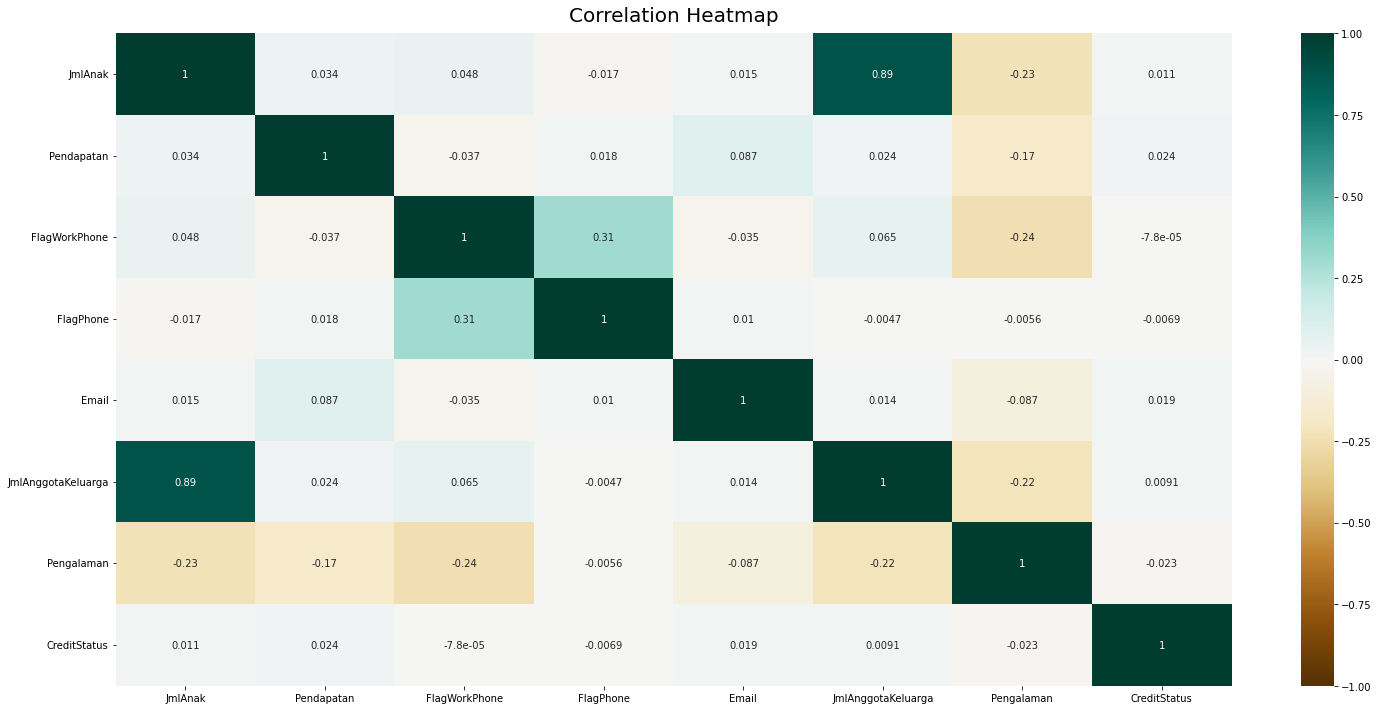

In [14]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

### 1.5 Handling Outlier

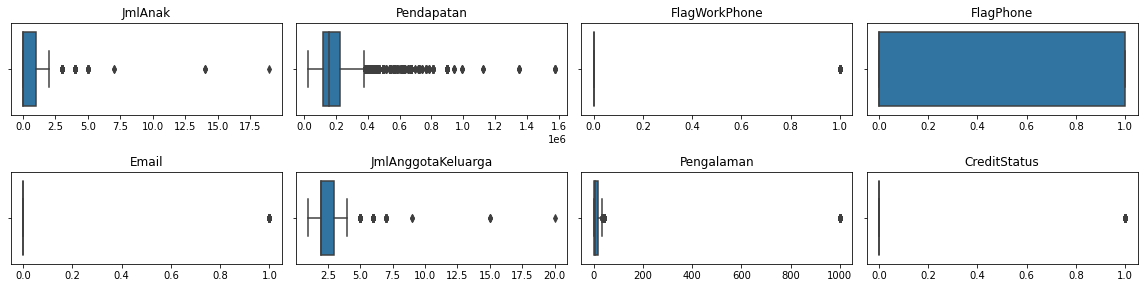

In [15]:
# Numerical Features
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1
    
for feature in numerical_features:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

> Ada beberapa cara untuk menghilangkan outliers.
* Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.
* Capping menggunakan nilai median
* Capping menggunakan nilai mean
* Capping menggunakan nilai modus

> **Referensi:** [handling outlier](https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/)

In [16]:
# Membuat function IQR Detection
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    print(f'IQR: {iqr}')
    upperlimit = q3 + limit
    lowerlimit = q1 - limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

# Buang Outlier
outlier_feature = [
                    'JmlAnak', 
                    'Pendapatan',
                    'JmlAnggotaKeluarga', 
                    'Pengalaman'
                    ]

for i in outlier_feature:
    print(i)
    outlier(df[i])
    print()

df = df[
        (df['JmlAnak'] < 2.5) & 
        (df['Pendapatan'] < 380250.0) & 
        (df['JmlAnggotaKeluarga'] < 4.5) & 
        (df['Pengalaman'] < 35.5)
        ]

JmlAnak
IQR: 1.0
Upper Limit: 2.5
Lower Limit: -1.5

Pendapatan
IQR: 103500.0
Upper Limit: 380250.0
Lower Limit: -33750.0

JmlAnggotaKeluarga
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5

Pengalaman
IQR: 13.0
Upper Limit: 35.5
Lower Limit: -16.5



In [17]:
# Clean dataframe from outlier
credit_risk_df = df.drop_duplicates()
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   object 
 7   StatusKeluarga       8562 non-null   object 
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   object 
 15  CreditStatus         8562 non-null   

In [18]:
credit_risk_df.value_counts('CreditStatus')

CreditStatus
0    6705
1    1857
dtype: int64

### 1.6 Visualization

In [19]:
# Visualisasi kolom status untuk melihat jumlah data
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 4), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

MAIN_COLOR = ["#29B5BF"] 
OTHER_COLOR = ["#777777"]

#### 1.6.1 Jenis Kelamin

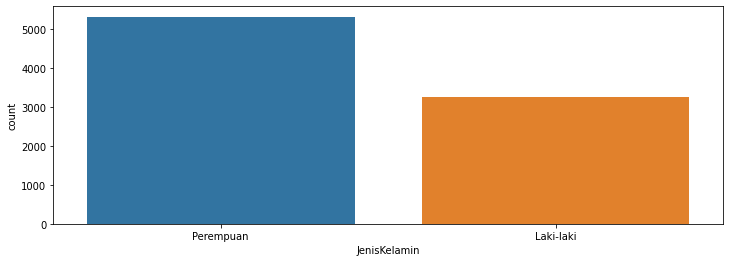

In [20]:
# Show visualization 'JenisKelamin'
plot_count(x="JenisKelamin", data=credit_risk_df)

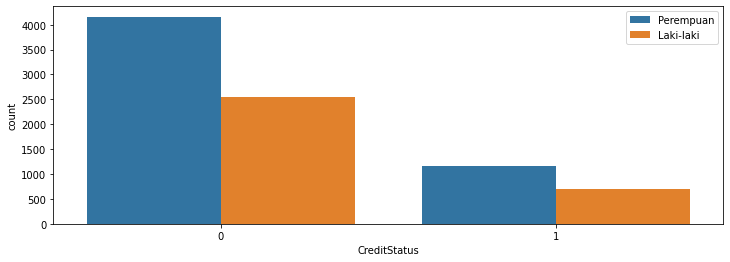

In [21]:
# Show visualization 'CreditStatus' terhadap 'JenisKelamin'
plot_count(x="CreditStatus", hue="JenisKelamin", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 1.6.2 Kepemilikan

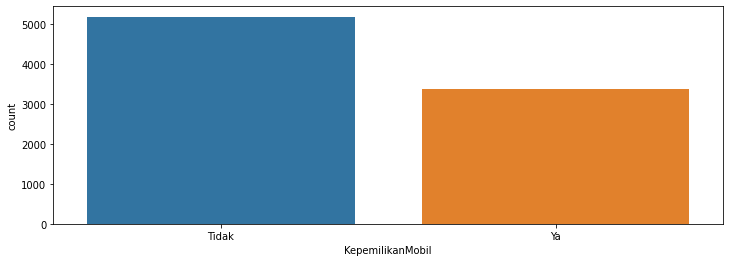

In [22]:
# Show visualization 'KepemilikanMobil'
plot_count(x="KepemilikanMobil", data=credit_risk_df)

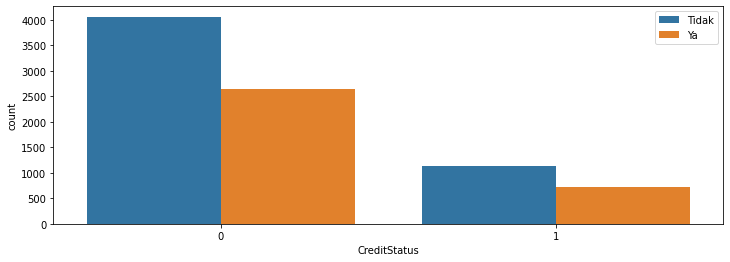

In [23]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanMobil'
plot_count(x="CreditStatus", hue="KepemilikanMobil", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

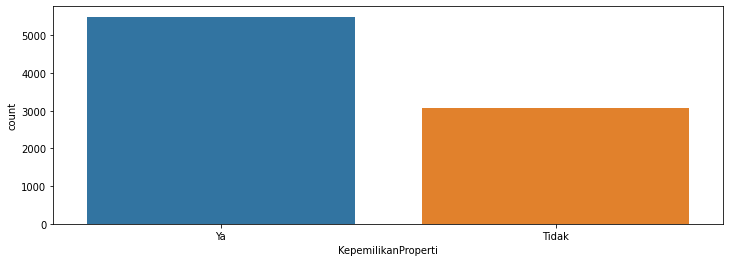

In [24]:
# Show visualization 'KepemilikanProperti'
plot_count(x="KepemilikanProperti", data=credit_risk_df)

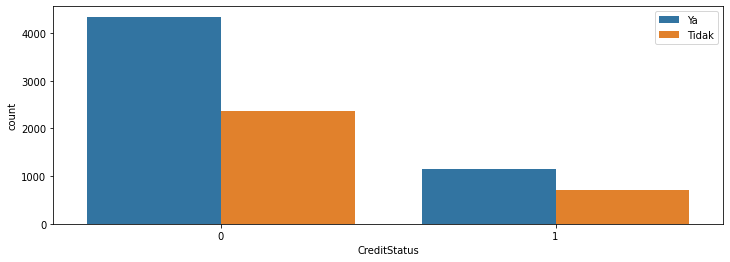

In [25]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanProperti'
plot_count(x="CreditStatus", hue="KepemilikanProperti", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 1.6.3 Credit Status

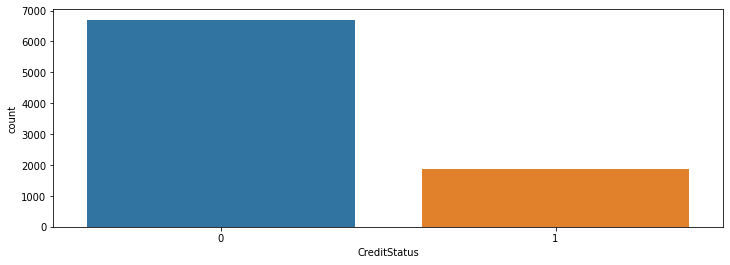

In [26]:
# Show visualization 'CreditStatus'
plot_count(x="CreditStatus", data=credit_risk_df)

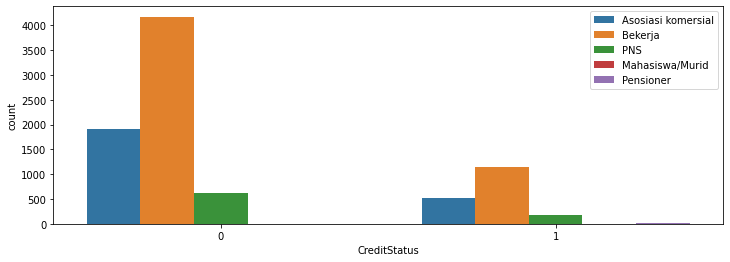

In [27]:
# Show visualization 'CreditStatus' terhadap 'TipePendapatan'
plot_count(x="CreditStatus", hue="TipePendapatan", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

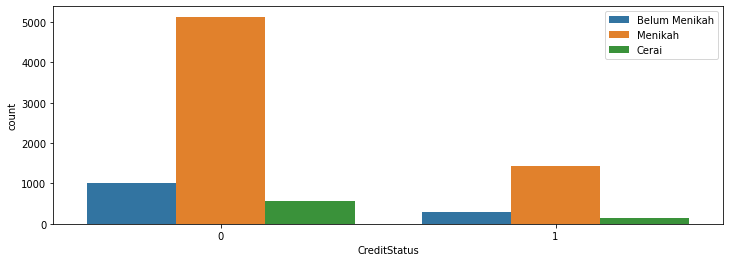

In [28]:
# Show visualization 'CreditStatus' terhadap 'StatusKeluarga'
plot_count(x="CreditStatus", hue="StatusKeluarga", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 1.6.4 Kategori Usia

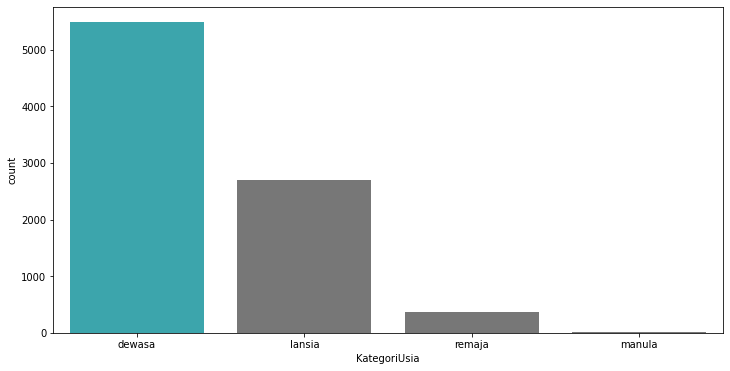

In [29]:
age_category = credit_risk_df.KategoriUsia.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="KategoriUsia",
    data=credit_risk_df,
    order=age_category,
    palette=["#29B5BF"] + (len(age_category)-1)*["#777777"]
)
plt.grid(False)

plt.show()

> **Insights:** 

> * Dari visualisasi di atas, terlihat bahwa mayoritas adalah kategori **Dewasa**.
> * Lalu, bagaimana distribusi kategori umur pada masing-masing responden yang memiliki sakit jantung maupun tidak? Mari kita buat visualisasinya.

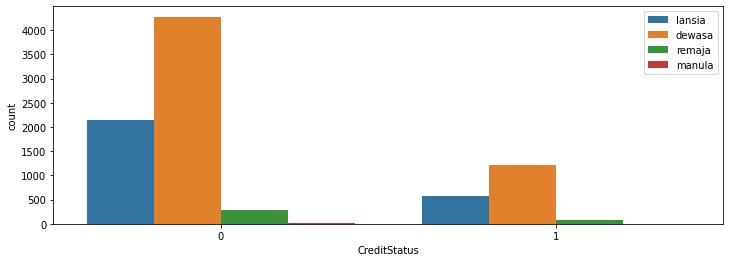

In [30]:
# Show visualization 'CreditStatus' terhadap 'KategoriUsia'
plot_count(x="CreditStatus", hue="KategoriUsia", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

## B. Modelling

In [31]:
credit_risk_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,Graduate,Belum Menikah,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [32]:
# Melihat isi data dari setiap kolom
for feature in df.columns:
    print(
        f"- Rows value pada kolom `{feature}`:",
        credit_risk_df[feature].unique()
    )

- Rows value pada kolom `JenisKelamin`: ['Perempuan' 'Laki-laki']
- Rows value pada kolom `KepemilikanMobil`: ['Tidak' 'Ya']
- Rows value pada kolom `KepemilikanProperti`: ['Ya' 'Tidak']
- Rows value pada kolom `JmlAnak`: [0 1 2]
- Rows value pada kolom `Pendapatan`: [270000.  130500.  157500.  112500.  135000.  211500.  126000.  247500.
 297000.  216000.  225000.  315000.  148500.  202500.  180000.  292500.
  74250.  144000.  193500.  139500.   76500.   67500.   90000.   81000.
 198000.   45000.  238500.   99000.  360000.  279000.  306000.  189000.
 328500.  310500.  171000.  121500.   72000.  184500.   94500.  256500.
 166500.  196650.   40500.  243000.  162000.  103500.  257625.   58500.
 207000.   54000.  234000.  117000.  261000.  175500.  337500.  119250.
  63000.  274500.   85500.  108000.  145350.  173250.   36000.  118350.
 153000.  123750.  252000.  220500.  133650.  265500.  227250.   51750.
  69750.  288000.  234135.   74061.  175950.  364500.  240750.  333000.
 342000.  11

### 2.1 Encoding

> **Note:** Jenis-Jenis Tipe Data
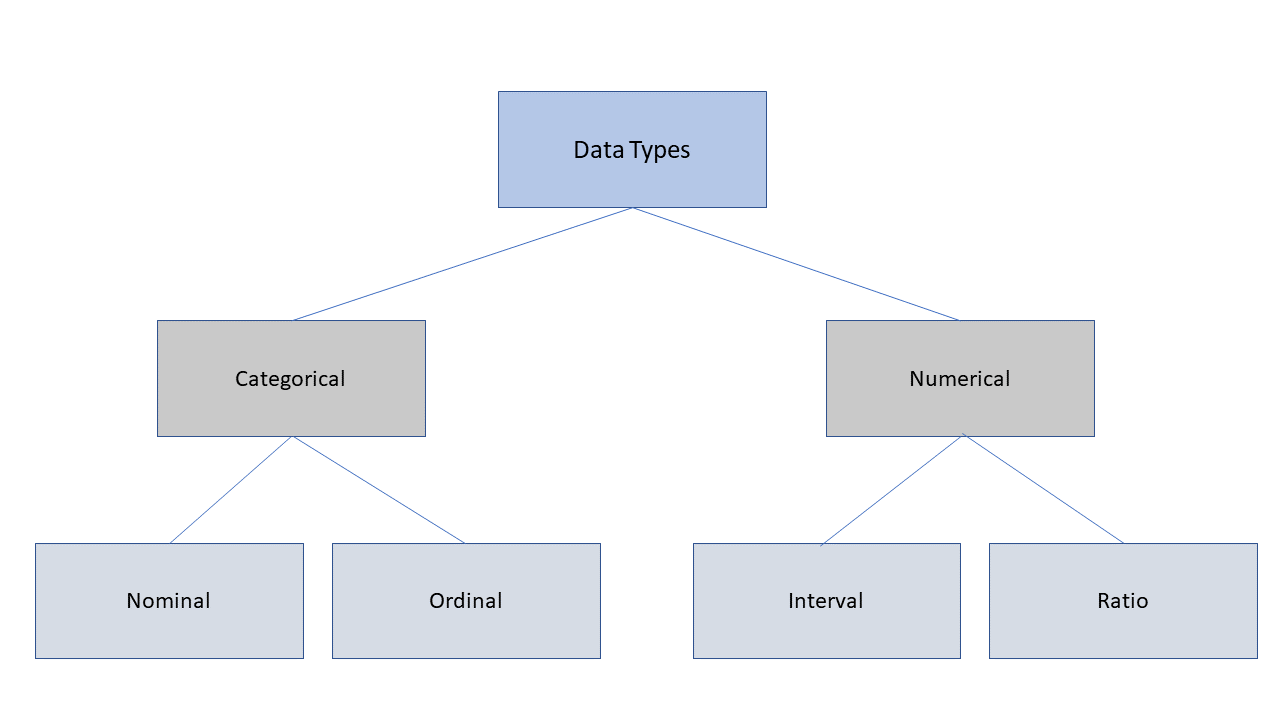

> Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Label Encoding*** untuk fitur kategorik tipe data ordinal seperti `TingkatPendidikan`, `StatusKeluarga`, `KategoriUsia` 
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio seperti `JenisKelamin`, `KepemilikanMobil`, `KepemilikanProperti`, `TipePendapatan`, `TipeRumah`.

#### 2.1.1 Label Encoding

In [33]:
# Creating instance of labelencoding
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
credit_risk_df['TingkatPendidikan'] = labelencoder.fit_transform(credit_risk_df['TingkatPendidikan'])
credit_risk_df.head()

<ipython-input-33-a00f7bbf5f19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['TingkatPendidikan'] = labelencoder.fit_transform(credit_risk_df['TingkatPendidikan'])


,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,Menikah,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,Menikah,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,Belum Menikah,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,Menikah,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [34]:
# Creating instance of labelencoding
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
credit_risk_df['StatusKeluarga'] = labelencoder.fit_transform(credit_risk_df['StatusKeluarga'])
credit_risk_df.head()

<ipython-input-34-5bd89775c7bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['StatusKeluarga'] = labelencoder.fit_transform(credit_risk_df['StatusKeluarga'])


,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [35]:
# Creating instance of labelencoding
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
credit_risk_df['KategoriUsia'] = labelencoder.fit_transform(credit_risk_df['KategoriUsia'])
credit_risk_df.head()

<ipython-input-35-562a501f57b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['KategoriUsia'] = labelencoder.fit_transform(credit_risk_df['KategoriUsia'])


,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [36]:
label_encoding = pd.DataFrame(credit_risk_df)
label_encoding.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [37]:
label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   int64  
 7   StatusKeluarga       8562 non-null   int64  
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   int64  
 15  CreditStatus         8562 non-null   

#### 2.1.2 One Hot Encoding

In [38]:
# Creating one hot encoding with pandas get dummy
one_hot_encoded = pd.get_dummies(label_encoding, columns = ['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TipeRumah'])
one_hot_encoded.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0,270000.0,0,0,0,1,1,1,8,1,...,1,0,0,0,0,0,0,0,1,0
7,0,130500.0,0,2,0,0,0,2,3,0,...,0,1,0,0,0,0,0,0,1,0
9,0,157500.0,0,2,0,1,0,2,4,0,...,0,1,0,0,0,0,0,0,1,0
12,1,112500.0,0,0,0,0,0,2,4,0,...,0,1,0,0,0,0,0,0,1,0
14,2,135000.0,0,2,0,0,0,4,9,0,...,0,1,0,0,0,0,0,0,1,0


In [39]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            8562 non-null   int64  
 1   Pendapatan                         8562 non-null   float64
 2   TingkatPendidikan                  8562 non-null   int64  
 3   StatusKeluarga                     8562 non-null   int64  
 4   FlagWorkPhone                      8562 non-null   int64  
 5   FlagPhone                          8562 non-null   int64  
 6   Email                              8562 non-null   int64  
 7   JmlAnggotaKeluarga                 8562 non-null   int64  
 8   Pengalaman                         8562 non-null   int64  
 9   KategoriUsia                       8562 non-null   int64  
 10  CreditStatus                       8562 non-null   int64  
 11  JenisKelamin_Laki-laki             8562 non-null   uint

### 2.2 Normalization

#### a. Cara 1 - with Scikit Learn

In [40]:
# Define min max scaler
mms = MinMaxScaler()

# Transform data
min_max_scaled = pd.DataFrame(mms.fit_transform(one_hot_encoded), columns=one_hot_encoded.columns).set_index(one_hot_encoded.index)
min_max_scaled.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.294872,0.0,1.0,0.0,0.0,0.0,0.333333,0.085714,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.371795,0.0,1.0,0.0,1.0,0.0,0.333333,0.114286,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0.5,0.243590,0.0,0.0,0.0,0.0,0.0,0.333333,0.114286,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,1.0,0.307692,0.0,1.0,0.0,0.0,0.0,1.000000,0.257143,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            8562 non-null   float64
 1   Pendapatan                         8562 non-null   float64
 2   TingkatPendidikan                  8562 non-null   float64
 3   StatusKeluarga                     8562 non-null   float64
 4   FlagWorkPhone                      8562 non-null   float64
 5   FlagPhone                          8562 non-null   float64
 6   Email                              8562 non-null   float64
 7   JmlAnggotaKeluarga                 8562 non-null   float64
 8   Pengalaman                         8562 non-null   float64
 9   KategoriUsia                       8562 non-null   float64
 10  CreditStatus                       8562 non-null   float64
 11  JenisKelamin_Laki-laki             8562 non-null   floa

### 2.3 Feature Scalling

In [42]:
# Define variable X (Independent variable / features)
X = min_max_scaled.drop(columns=["CreditStatus"]).copy()

# Define variable y (Dependent variable / target variable)
Y = min_max_scaled["CreditStatus"].copy()

### 2.4 Handling Imbalance

In [43]:
# Define smote
oversampling = SMOTE(sampling_strategy='auto')

# Fit the over sampling
X_r, Y_r = oversampling.fit_resample(X, Y)

print('Original dataset shape is ', Counter(Y))
print('Resample dataset shape is ', Counter(Y_r))

Original dataset shape is  Counter({0.0: 6705, 1.0: 1857})
Resample dataset shape is  Counter({0.0: 6705, 1.0: 6705})


### 2.5 Data Splitting

> Pada tahap ini, membagi dataset menjadi 2, yaitu: 
> * **data train**, dan
> * **data test** 

> Dengan proporsi **80% : 20%**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 12)

### 2.6 Modelling

In [45]:
# Evaluation Metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

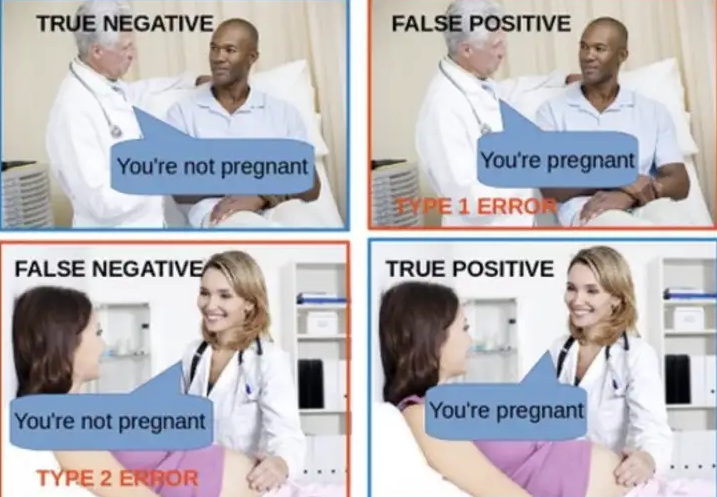

#### 2.6.1 LightGBM

In [46]:
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train, Y_train)

LGBMClassifier()

In [47]:
Y_train_lgbm = lgbm.predict(X_train)
Y_test_lgbm = lgbm.predict(X_test)

In [48]:
classification_eval(Y_train, Y_train_lgbm, 'LightGBM Training')

Evaluation Model: LightGBM Training
[[5341    4]
 [1471   33]]
Accuracy   : 78.46 %
Precision  : 89.19 %
Recall     : 2.19 %
F1_Score   : 4 %


In [49]:
"""
classification_eval(Y_test, Y_test_lgbm, 'LightGBM Testing')

ValueError: cannot convert float NaN to integer
"""

"\nclassification_eval(Y_test, Y_test_lgbm, 'LightGBM Testing')\n\nValueError: cannot convert float NaN to integer\n"

#### 2.6.2 K-Nearest Neighbor

In [50]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
Y_train_knn = knn.predict(X_train)
Y_test_knn = knn.predict(X_test)

In [52]:
classification_eval(Y_train, Y_train_knn, 'KNN Training')

Evaluation Model: KNN Training
[[5284   61]
 [1420   84]]
Accuracy   : 78.38 %
Precision  : 57.93 %
Recall     : 5.59 %
F1_Score   : 10 %


In [53]:
classification_eval(Y_test, Y_test_knn, 'KNN Testing')

Evaluation Model: KNN Testing
[[1329   31]
 [ 349    4]]
Accuracy   : 77.82 %
Precision  : 11.43 %
Recall     : 1.13 %
F1_Score   : 2 %


#### 2.6.3 Decision Tree

In [54]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [55]:
Y_train_dtc = dtc.predict(X_train)
Y_test_dtc = dtc.predict(X_test)

In [56]:
classification_eval(Y_train, Y_train_dtc, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[5345    0]
 [ 828  676]]
Accuracy   : 87.91 %
Precision  : 100.0 %
Recall     : 44.95 %
F1_Score   : 62 %


In [57]:
classification_eval(Y_test, Y_test_dtc, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[958 402]
 [331  22]]
Accuracy   : 57.21 %
Precision  : 5.19 %
Recall     : 6.23 %
F1_Score   : 6 %


#### 2.6.4 CatBoost

In [58]:
cbc = CatBoostClassifier()
cbc.fit(X_train, Y_train)

Learning rate set to 0.023429
0:	learn: 0.6848836	total: 53.5ms	remaining: 53.4s
1:	learn: 0.6768923	total: 57.8ms	remaining: 28.8s
2:	learn: 0.6692838	total: 61.4ms	remaining: 20.4s
3:	learn: 0.6620600	total: 64.7ms	remaining: 16.1s
4:	learn: 0.6552301	total: 67.9ms	remaining: 13.5s
5:	learn: 0.6488201	total: 70.4ms	remaining: 11.7s
6:	learn: 0.6425688	total: 73.6ms	remaining: 10.4s
7:	learn: 0.6366705	total: 77.1ms	remaining: 9.56s
8:	learn: 0.6311741	total: 80.1ms	remaining: 8.81s
9:	learn: 0.6258962	total: 84.7ms	remaining: 8.38s
10:	learn: 0.6209140	total: 88.5ms	remaining: 7.96s
11:	learn: 0.6160914	total: 95.7ms	remaining: 7.88s
12:	learn: 0.6116079	total: 99ms	remaining: 7.51s
13:	learn: 0.6072276	total: 102ms	remaining: 7.2s
14:	learn: 0.6031207	total: 106ms	remaining: 6.93s
15:	learn: 0.5990819	total: 109ms	remaining: 6.71s
16:	learn: 0.5953697	total: 112ms	remaining: 6.5s
17:	learn: 0.5917634	total: 116ms	remaining: 6.32s
18:	learn: 0.5884248	total: 119ms	remaining: 6.15s
19

In [59]:
Y_train_cbc = cbc.predict(X_train)
Y_test_cbc = cbc.predict(X_test)

In [60]:
classification_eval(Y_train, Y_train_cbc, 'CatBoost Training')

Evaluation Model: CatBoost Training
[[5345    0]
 [1430   74]]
Accuracy   : 79.12 %
Precision  : 100.0 %
Recall     : 4.92 %
F1_Score   : 9 %


In [61]:
classification_eval(Y_test, Y_test_cbc, 'CatBoost testing')

Evaluation Model: CatBoost testing
[[1344   16]
 [ 346    7]]
Accuracy   : 78.87 %
Precision  : 30.43 %
Recall     : 1.98 %
F1_Score   : 4 %


#### 2.6.5 Logistic Regression

In [62]:
# Instantiate the model
log_reg = LogisticRegression()

# Fit the model using the training data
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
Y_train_lr = log_reg.predict(X_train)
Y_test_lr = log_reg.predict(X_test)

In [64]:
classification_eval(Y_train, Y_train_lr, 'Logistic Regression Training')

Evaluation Model: Logistic Regression Training
[[5345    0]
 [1494   10]]
Accuracy   : 78.19 %
Precision  : 100.0 %
Recall     : 0.66 %
F1_Score   : 1 %


In [65]:
classification_eval(Y_test, Y_test_lr, 'Logistic Regression Testing')

Evaluation Model: Logistic Regression Testing
[[1360    0]
 [ 351    2]]
Accuracy   : 79.51 %
Precision  : 100.0 %
Recall     : 0.57 %
F1_Score   : 1 %


#### 2.6.6 Support Vector Machine

In [66]:
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [67]:
Y_train_svm = svm.predict(X_train)
Y_test_svm = svm.predict(X_test)

In [68]:
classification_eval(Y_train, Y_train_svm, 'SVM Training')

Evaluation Model: SVM Training
[[5345    0]
 [1494   10]]
Accuracy   : 78.19 %
Precision  : 100.0 %
Recall     : 0.66 %
F1_Score   : 1 %


In [69]:
classification_eval(Y_test, Y_test_svm, 'SVM Testing')

Evaluation Model: SVM Testing
[[1360    0]
 [ 351    2]]
Accuracy   : 79.51 %
Precision  : 100.0 %
Recall     : 0.57 %
F1_Score   : 1 %


#### 2.6.7 XGBoost

In [70]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier()

In [71]:
Y_train_xgb = xgb.predict(X_train)
Y_test_xgb = xgb.predict(X_test)

In [72]:
classification_eval(Y_train, Y_train_xgb, 'XGBoost Training')

Evaluation Model: XGBoost Training
[[5345    0]
 [1494   10]]
Accuracy   : 78.19 %
Precision  : 100.0 %
Recall     : 0.66 %
F1_Score   : 1 %


In [73]:
classification_eval(Y_test, Y_test_xgb, 'XGBoost testing')

Evaluation Model: XGBoost testing
[[1360    0]
 [ 351    2]]
Accuracy   : 79.51 %
Precision  : 100.0 %
Recall     : 0.57 %
F1_Score   : 1 %


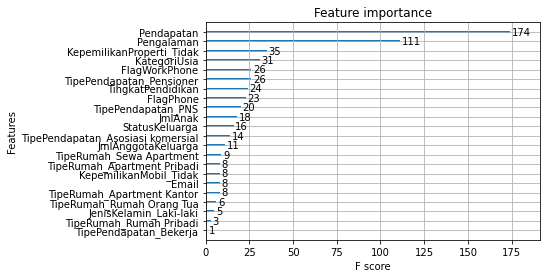

In [74]:
# plot feature importance using built-in function
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb)
pyplot.show()

#### 2.6.8 Random Forest

In [75]:
rfc = RandomForestClassifier(max_depth=7)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

In [76]:
Y_train_rfc = rfc.predict(X_train)
Y_test_rfc = rfc.predict(X_test)

In [77]:
classification_eval(Y_train, Y_train_rfc, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[5345    0]
 [1493   11]]
Accuracy   : 78.2 %
Precision  : 100.0 %
Recall     : 0.73 %
F1_Score   : 1 %


In [78]:
classification_eval(Y_test, Y_test_rfc, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[1359    1]
 [ 351    2]]
Accuracy   : 79.45 %
Precision  : 66.67 %
Recall     : 0.57 %
F1_Score   : 1 %


In [79]:
# Obtaining feature importances
rfc.feature_importances_

array([0.03500573, 0.17800234, 0.04791488, 0.03870703, 0.03208152,
       0.02874305, 0.0274057 , 0.04661135, 0.14209072, 0.04158259,
       0.02125566, 0.01717668, 0.02120705, 0.02101511, 0.01838025,
       0.02812174, 0.02518791, 0.024265  , 0.00373943, 0.02597282,
       0.08978982, 0.01373797, 0.01521981, 0.02030119, 0.02173452,
       0.0147501 ])

In [80]:
# Obtaining feature names
rfc.feature_names_in_

array(['JmlAnak', 'Pendapatan', 'TingkatPendidikan', 'StatusKeluarga',
       'FlagWorkPhone', 'FlagPhone', 'Email', 'JmlAnggotaKeluarga',
       'Pengalaman', 'KategoriUsia', 'JenisKelamin_Laki-laki',
       'JenisKelamin_Perempuan', 'KepemilikanMobil_Tidak',
       'KepemilikanMobil_Ya', 'KepemilikanProperti_Tidak',
       'KepemilikanProperti_Ya', 'TipePendapatan_Asosiasi komersial',
       'TipePendapatan_Bekerja', 'TipePendapatan_Mahasiswa/Murid',
       'TipePendapatan_PNS', 'TipePendapatan_Pensioner',
       'TipeRumah_Apartment Kantor', 'TipeRumah_Apartment Pribadi',
       'TipeRumah_Rumah Orang Tua', 'TipeRumah_Rumah Pribadi',
       'TipeRumah_Sewa Apartment'], dtype=object)

> Berikut adalah fungsi melihat `feature importances` pada suatu dataset

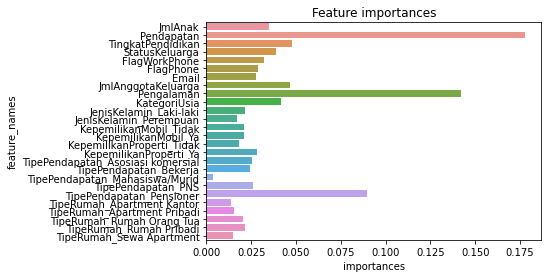

In [81]:
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : rfc.feature_names_in_, 
                               "importances" : rfc.feature_importances_})
                             
# Plotting bar chart, g is from graph
g = sns.barplot(x=importances_df["importances"], 
                y=importances_df["feature_names"])
g.set_title("Feature importances", fontsize=12);            

Feature: 0, Score: 0.03501
Feature: 1, Score: 0.17800
Feature: 2, Score: 0.04791
Feature: 3, Score: 0.03871
Feature: 4, Score: 0.03208
Feature: 5, Score: 0.02874
Feature: 6, Score: 0.02741
Feature: 7, Score: 0.04661
Feature: 8, Score: 0.14209
Feature: 9, Score: 0.04158
Feature: 10, Score: 0.02126
Feature: 11, Score: 0.01718
Feature: 12, Score: 0.02121
Feature: 13, Score: 0.02102
Feature: 14, Score: 0.01838
Feature: 15, Score: 0.02812
Feature: 16, Score: 0.02519
Feature: 17, Score: 0.02426
Feature: 18, Score: 0.00374
Feature: 19, Score: 0.02597
Feature: 20, Score: 0.08979
Feature: 21, Score: 0.01374
Feature: 22, Score: 0.01522
Feature: 23, Score: 0.02030
Feature: 24, Score: 0.02173
Feature: 25, Score: 0.01475


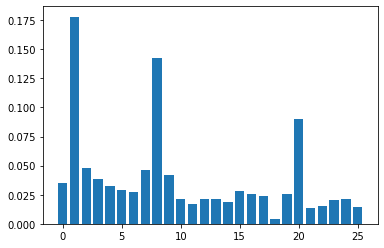

In [82]:
# Get importance
importance = rfc.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## C. **SUMMARY**
> Berdasarkan beberapa uji coba model di atas, maka dapat disimpulkan bahwa model `Random Forest` yang paling tepat untuk diaplikasikan pada **Credit Risk Analysis** dataset

# **PREDICT DATA & MODELLING - DATA TEST**

## A. EDA

### 1.1 Data Loading

In [83]:
data_test = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/data_test.csv')
data_test.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,NaN,4.0,32.0,8.0


In [84]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          200 non-null    int64  
 1   JK                   200 non-null    object 
 2   KepemilikanMobil     200 non-null    object 
 3   KepemilikanProperti  200 non-null    object 
 4   JmlAnak              200 non-null    int64  
 5   Pendapatan           200 non-null    float64
 6   TipePendapatan       200 non-null    object 
 7   TingkatPendidikan    200 non-null    object 
 8   StatusKeluarga       200 non-null    object 
 9   TipeRumah            200 non-null    object 
 10  FlagMobile           200 non-null    int64  
 11  FlagWorkPhone        200 non-null    int64  
 12  FlagPhone            200 non-null    int64  
 13  Email                200 non-null    int64  
 14  Pekerjaan            141 non-null    object 
 15  JmlAnggotaKeluarga   200 non-null    flo

In [85]:
data_test.dtypes.value_counts()

object     8
int64      6
float64    4
dtype: int64

In [86]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in data_test.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        data_test[feature].nunique()
    )

- Jumlah unique value pada kolom `Id_customer`: 200
- Jumlah unique value pada kolom `JK`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 5
- Jumlah unique value pada kolom `Pendapatan`: 46
- Jumlah unique value pada kolom `TipePendapatan`: 4
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `Pekerjaan`: 13
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 5
- Jumlah unique value pada kolom `Age`: 42
- Jumlah unique value pada kolom `Experience`: 27


In [87]:
# Melihat apakah ada missing value dari dataset
data_test.isna().sum()

Id_customer             0
JK                      0
KepemilikanMobil        0
KepemilikanProperti     0
JmlAnak                 0
Pendapatan              0
TipePendapatan          0
TingkatPendidikan       0
StatusKeluarga          0
TipeRumah               0
FlagMobile              0
FlagWorkPhone           0
FlagPhone               0
Email                   0
Pekerjaan              59
JmlAnggotaKeluarga      0
Age                     0
Experience              0
dtype: int64

In [88]:
# Mengecek baris yang duplikat
data_test[data_test['Id_customer'].duplicated()]

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience


In [89]:
# Rename 'JK', 'Age', dan 'Experience' Columns
data_test.rename(
    columns = {'JK':'JenisKelamin', 
               'Age':'Usia',
               'Experience':'Pengalaman'
               }, inplace=True
               )

### 1.2 Binning

In [90]:
# Mengelompokkan 'Usia' menjadi beberapa kategori:
# '10-24': remaja, '25-44': dewasa, '45-64': lansia, dan '>=65': manula 
data_test['KategoriUsia'] = pd.cut(x=data_test['Usia'], bins=[10, 25, 45, 65, 75], labels=['remaja', 'dewasa', 'lansia', 'manula'])
data_test['KategoriUsia']

0      lansia
1      dewasa
2      dewasa
3      lansia
4      dewasa
        ...  
195    lansia
196    lansia
197    dewasa
198    lansia
199    dewasa
Name: KategoriUsia, Length: 200, dtype: category
Categories (4, object): ['remaja' < 'dewasa' < 'lansia' < 'manula']

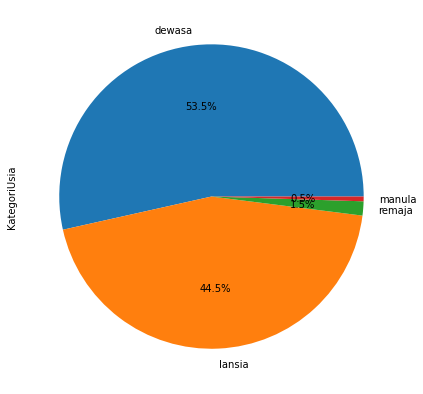

In [91]:
data_test['KategoriUsia'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

In [92]:
# Menghapus kolom yang tidak digunakan
data_test = data_test.drop(columns=['Id_customer', 'FlagMobile', 'Pekerjaan', 'Usia'])
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   JenisKelamin         200 non-null    object  
 1   KepemilikanMobil     200 non-null    object  
 2   KepemilikanProperti  200 non-null    object  
 3   JmlAnak              200 non-null    int64   
 4   Pendapatan           200 non-null    float64 
 5   TipePendapatan       200 non-null    object  
 6   TingkatPendidikan    200 non-null    object  
 7   StatusKeluarga       200 non-null    object  
 8   TipeRumah            200 non-null    object  
 9   FlagWorkPhone        200 non-null    int64   
 10  FlagPhone            200 non-null    int64   
 11  Email                200 non-null    int64   
 12  JmlAnggotaKeluarga   200 non-null    float64 
 13  Pengalaman           200 non-null    float64 
 14  KategoriUsia         200 non-null    category
dtypes: category(1), float64

## B. Modelling

# **SUMMARY**

> Berdasarkan beberapa uji coba model di atas, maka dapat disimpulkan bahwa model `XGBoost` dan `CatBoost` yang paling tepat untuk diaplikasikan pada **Credit Risk Analysis** dataset

In [93]:
data_test['default'] = ranfor.predict(data_test[['student','employment','credit_card','balance','income','age','monthly tenure']])

data_test[['customer_id', 'default']].to_csv('submission_data.csv', index = False)
data_test[['customer_id', 'default']].head(10)

NameError: ignored